<a href="https://colab.research.google.com/github/argentteb/argentteb.github.io/blob/main/Desafio_CrossValidation_ArgentoCaputo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. ABSTRACTO**
El dataset comprende valores de venta de propiedades en el estado de IOWA, USA. Contiene 79 variables explicativas que nos ayudan a describir la gran mayoría de los aspectos que pueden impactar en el precio.

Fue compilado por Dean De Cock para uso en educación de ciencia de datos.

La motivación del análisis a efectuar es desarrollar un modelo predictivo que permita obtener el valor de una propiedad en función de sus características principales.



###**01.01. Objetivo**
Identificar cuáles son las variables que alteran, modifican, o afectan de manera directa e indirecta en el valor de una propiedad en IOWA. Lograr entregar al cliente un modelo que permita colocar un precio acorde de venta a las propiedades a ofrecer.

###**01.02. Preguntas a resolver**

1 - ¿Hay alguna tendencia entre alguna de las calificaciones de las viviendas ('OverallCond' u 'OverallQual') y su precio de venta?

2 - ¿Puede identificarse alguna tendencia del precio de venta en función de la superficie del primer y segundo piso de la propiedad?

3 - ¿Qué papel juega el tipo de transacción con el que se adquirió la vivienda?

4 - ¿Qué zona de emplazamiento (MSZoning) es la más valorada por los compradores?

###**01.03. Contexto Comercial**
El mercado inmobiliario de Iowa, USA es de alta competencia. Las múltiples compañías que participan en el mismo se disputan por minimizar sus costos fijos en fuerza operativa. Las consultoras encargadas de tasar viviendas representan un costo del 5% del ingreso neto promedio.

###**01.04. Problema Comercial**
El cliente, inmobiliaria reconocida en Iowa, pretende aumentar su productividad y eficiencia en costos realizando una auditoría básica de sus propiedades en la que se zondeen ciertos parámetros que determinen la calidad de cada vivienda. En base a estos parámetros, propone desarrollar una API que permita a los tasadores obtener un valor estimativo de la propiedad.

#**02. EDA**

In [4]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import pandas_profiling as pdpf
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import os
from   scipy import stats
import statsmodels.formula.api as sm
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
%matplotlib INLINE


In [10]:
import pandas as pd

url = 'https://raw.githubusercontent.com/argentteb/argentteb.github.io/main/House_prices/train.csv'
df1 = pd.read_csv(url)
df1.head()





Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
df = df1.drop(columns = 'MSZoning')
df

Id  MSSubClass  LotFrontage  LotArea Street Alley LotShape  \
0        1          60         65.0     8450   Pave   NaN      Reg   
1        2          20         80.0     9600   Pave   NaN      Reg   
2        3          60         68.0    11250   Pave   NaN      IR1   
3        4          70         60.0     9550   Pave   NaN      IR1   
4        5          60         84.0    14260   Pave   NaN      IR1   
...    ...         ...          ...      ...    ...   ...      ...   
1455  1456          60         62.0     7917   Pave   NaN      Reg   
1456  1457          20         85.0    13175   Pave   NaN      Reg   
1457  1458          70         66.0     9042   Pave   NaN      Reg   
1458  1459          20         68.0     9717   Pave   NaN      Reg   
1459  1460          20         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [12]:
#Cuáles son los atributos que estaremos manejando?
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeck

Text(0.5, 0, 'Surface [sq.feet]')

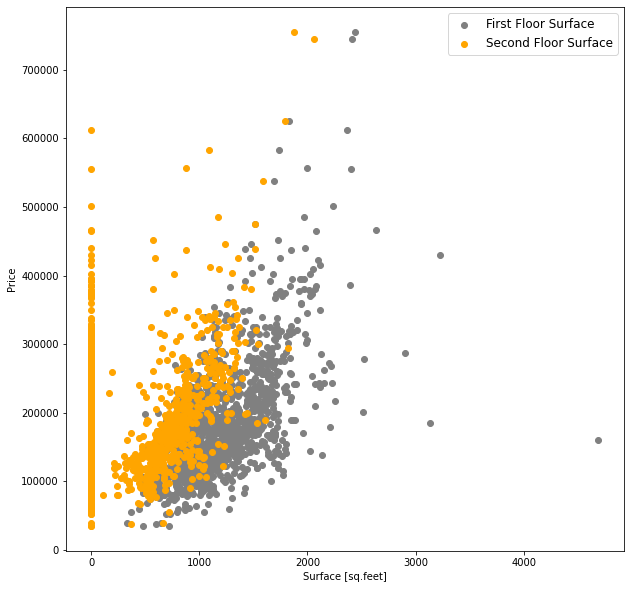

In [13]:
# Se grafica en matplotlib la relación entre área de primer piso y segundo piso y el precio de la propiedad

plt.figure(figsize=(10,10))
plt.scatter(df['1stFlrSF'], df['SalePrice'], color='grey', label="First Floor Surface")
plt.scatter(df['2ndFlrSF'], df['SalePrice'], color='orange', label="Second Floor Surface")
plt.legend(loc='best', facecolor='w', fontsize=12)
plt.ylabel('Price')
plt.xlabel('Surface [sq.feet]')




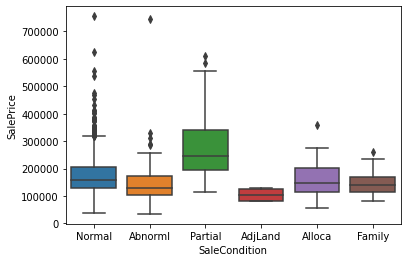

In [14]:
# ¿Cómo es la distribución del precio de las propiedades en función del tipo de transacción?

Price_vs_SaleCond = sns.boxplot(x="SaleCondition", y="SalePrice", data=df)

Text(0.5, 1.0, 'Price Vs MSZoning')

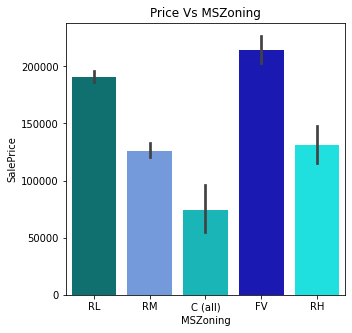

In [15]:
#¿Qué relación existe entre el tipo de emplazamiento de la vivienda y su precio?
#Con el gráfico de barras observaremos la media del precio de cada venta de cada categoría de emplazamiento

f, axs = plt.subplots(figsize=(5, 5))
color=['teal', 'cornflowerblue','darkturquoise','mediumblue', 'cyan']
Price_vs_SaleCond = sns.barplot(x="MSZoning", y="SalePrice", data=df1, palette=color)
plt.title("Price Vs MSZoning")

Text(0.5, 1.0, 'Price Vs MSZoning')

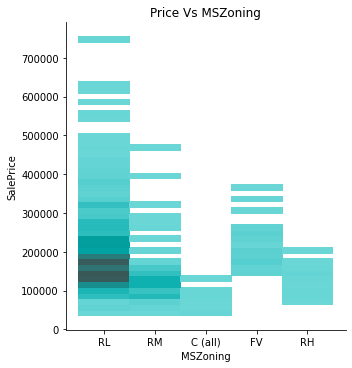

In [16]:
#¿Qué dispersión tienen los datos de cada tipo de emplazamiento?

sns.displot(x="MSZoning", y="SalePrice", data=df1, color="teal", height=5, aspect=1)
plt.title("Price Vs MSZoning")

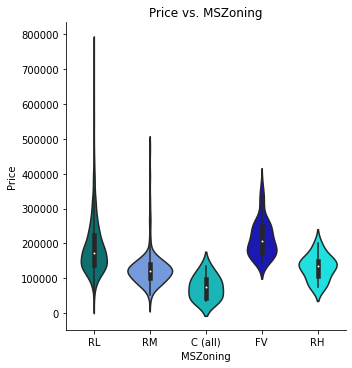

In [17]:
#Otra forma de ver la distribución anterior: gráfico de Violín

color=['teal', 'cornflowerblue','darkturquoise','mediumblue', 'cyan']
ax = sns.catplot(data=df1, kind='violin', x='MSZoning', y='SalePrice', split=True, palette=color)
ax.set(xlabel='MSZoning', ylabel='Price', title='Price vs. MSZoning')

In [18]:
#Los datos de las viviendas RL tienen mucha dispersión, aunque observamos mayor densidad dentro del rango USD150000 a 200000
#Vamos entonces a ver cuántos datos tenemos de viviendas RL y cuántos de FV

df_RL = df1.loc[df1.MSZoning=="RL"]
df_FV = df1.loc[df1.MSZoning=="FV"]

In [19]:
lenRL = len(df_RL.SalePrice)
lenFV = len(df_FV.SalePrice)

print("We have",lenRL, "houses in residential low density zones vs. ", lenFV, "houses in Floating Villages.")

We have 1151 houses in residential low density zones vs.  65 houses in Floating Villages.


In [20]:
#Observamos que parte de esta dispersión que tiene las viviendas RL no es comparable con las FV por la cantidad de datos

In [21]:
#¿Existe una relación entre los precios elevados de las viviendas RL y la existencia de pileta en las mismas?

#Creamos una columna donde el valor de PoolArea sea 0, indique que la vivienda no tiene pileta. Si el valor es >0, indica que si la tiene
df_RL['PoolArea2'] = np.where(df_RL['PoolArea']>0, 'WithPool', 'WithoutPool')
df_RL.head()


<ipython-input-21-af7842eacb1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RL['PoolArea2'] = np.where(df_RL['PoolArea']>0, 'WithPool', 'WithoutPool')


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice    PoolArea2  
0       WD         Normal     208500  WithoutPool  
1       WD         Normal     181500  WithoutPool  
2       WD         Normal     223500  WithoutPool  
3       WD        Abnorml     140000  WithoutPool  
4       WD         Normal     250000  WithoutPool  

[5 rows x 82 columns]

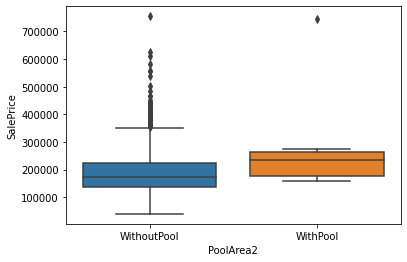

In [22]:
Price_vs_Pool = sns.boxplot(x="PoolArea2", y="SalePrice", data=df_RL)

In [23]:
#Observamos que la media sigue encontrandose alrededor de los USD200000 y los outliers siguen existiendo
#¿Cuántas viviendas RL tienen pileta?

Pool = []
for num in df1.PoolArea:
    if num > 0:
        Pool.append(1)
    if num == 0:
        Pool.append(0)

        continue

In [24]:
PoolArray = np.array(Pool)

In [25]:
a = Pool.count(1)
a

7

Text(0, 0.5, 'Variables')

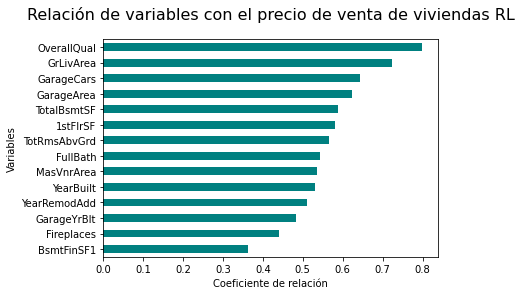

In [26]:
#Vemos que solo 7 casas RL tienen pileta
#Al tener mucha dispersión los datos de las viviendas emplazadas en RL, buscamos qué variables son los que más relación tienen con el precio

cor = df_RL.corr()

cor.SalePrice.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:15][::-1].plot(kind='barh',
                                                                                            color='teal')
plt.title("Relación de variables con el precio de venta de viviendas RL", size=16, pad=20)
plt.xlabel("Coeficiente de relación")
plt.ylabel("Variables")

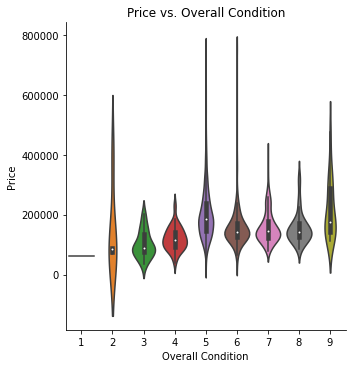

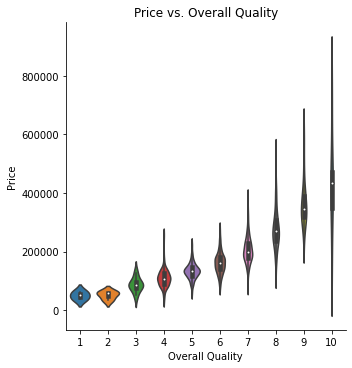

In [27]:
# ¿Cómo es la distribución del precio de las propiedades en función de su condición general?

ax1 = sns.catplot(data=df, kind='violin', x='OverallCond', y='SalePrice',split=True)
ax1.set(xlabel='Overall Condition', ylabel='Price', title='Price vs. Overall Condition')
ax2 = sns.catplot(data=df, kind='violin', x='OverallQual', y='SalePrice',split=True)
ax2.set(xlabel='Overall Quality', ylabel='Price', title='Price vs. Overall Quality')

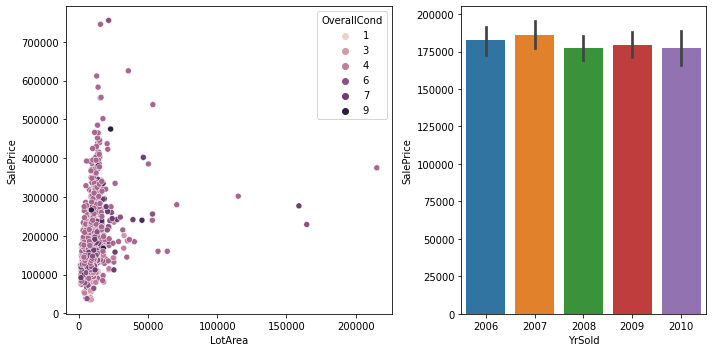

In [28]:
# ¿Hay alguna relación entre el año de venta o el área del lote con el precio de venta? - Gráficos en Seaborn con axeslevels en matplotlib

f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="LotArea", y="SalePrice", hue="OverallCond", ax=axs[0])
sns.barplot(data=df, x="YrSold", y="SalePrice", ax=axs[1]); f.tight_layout()

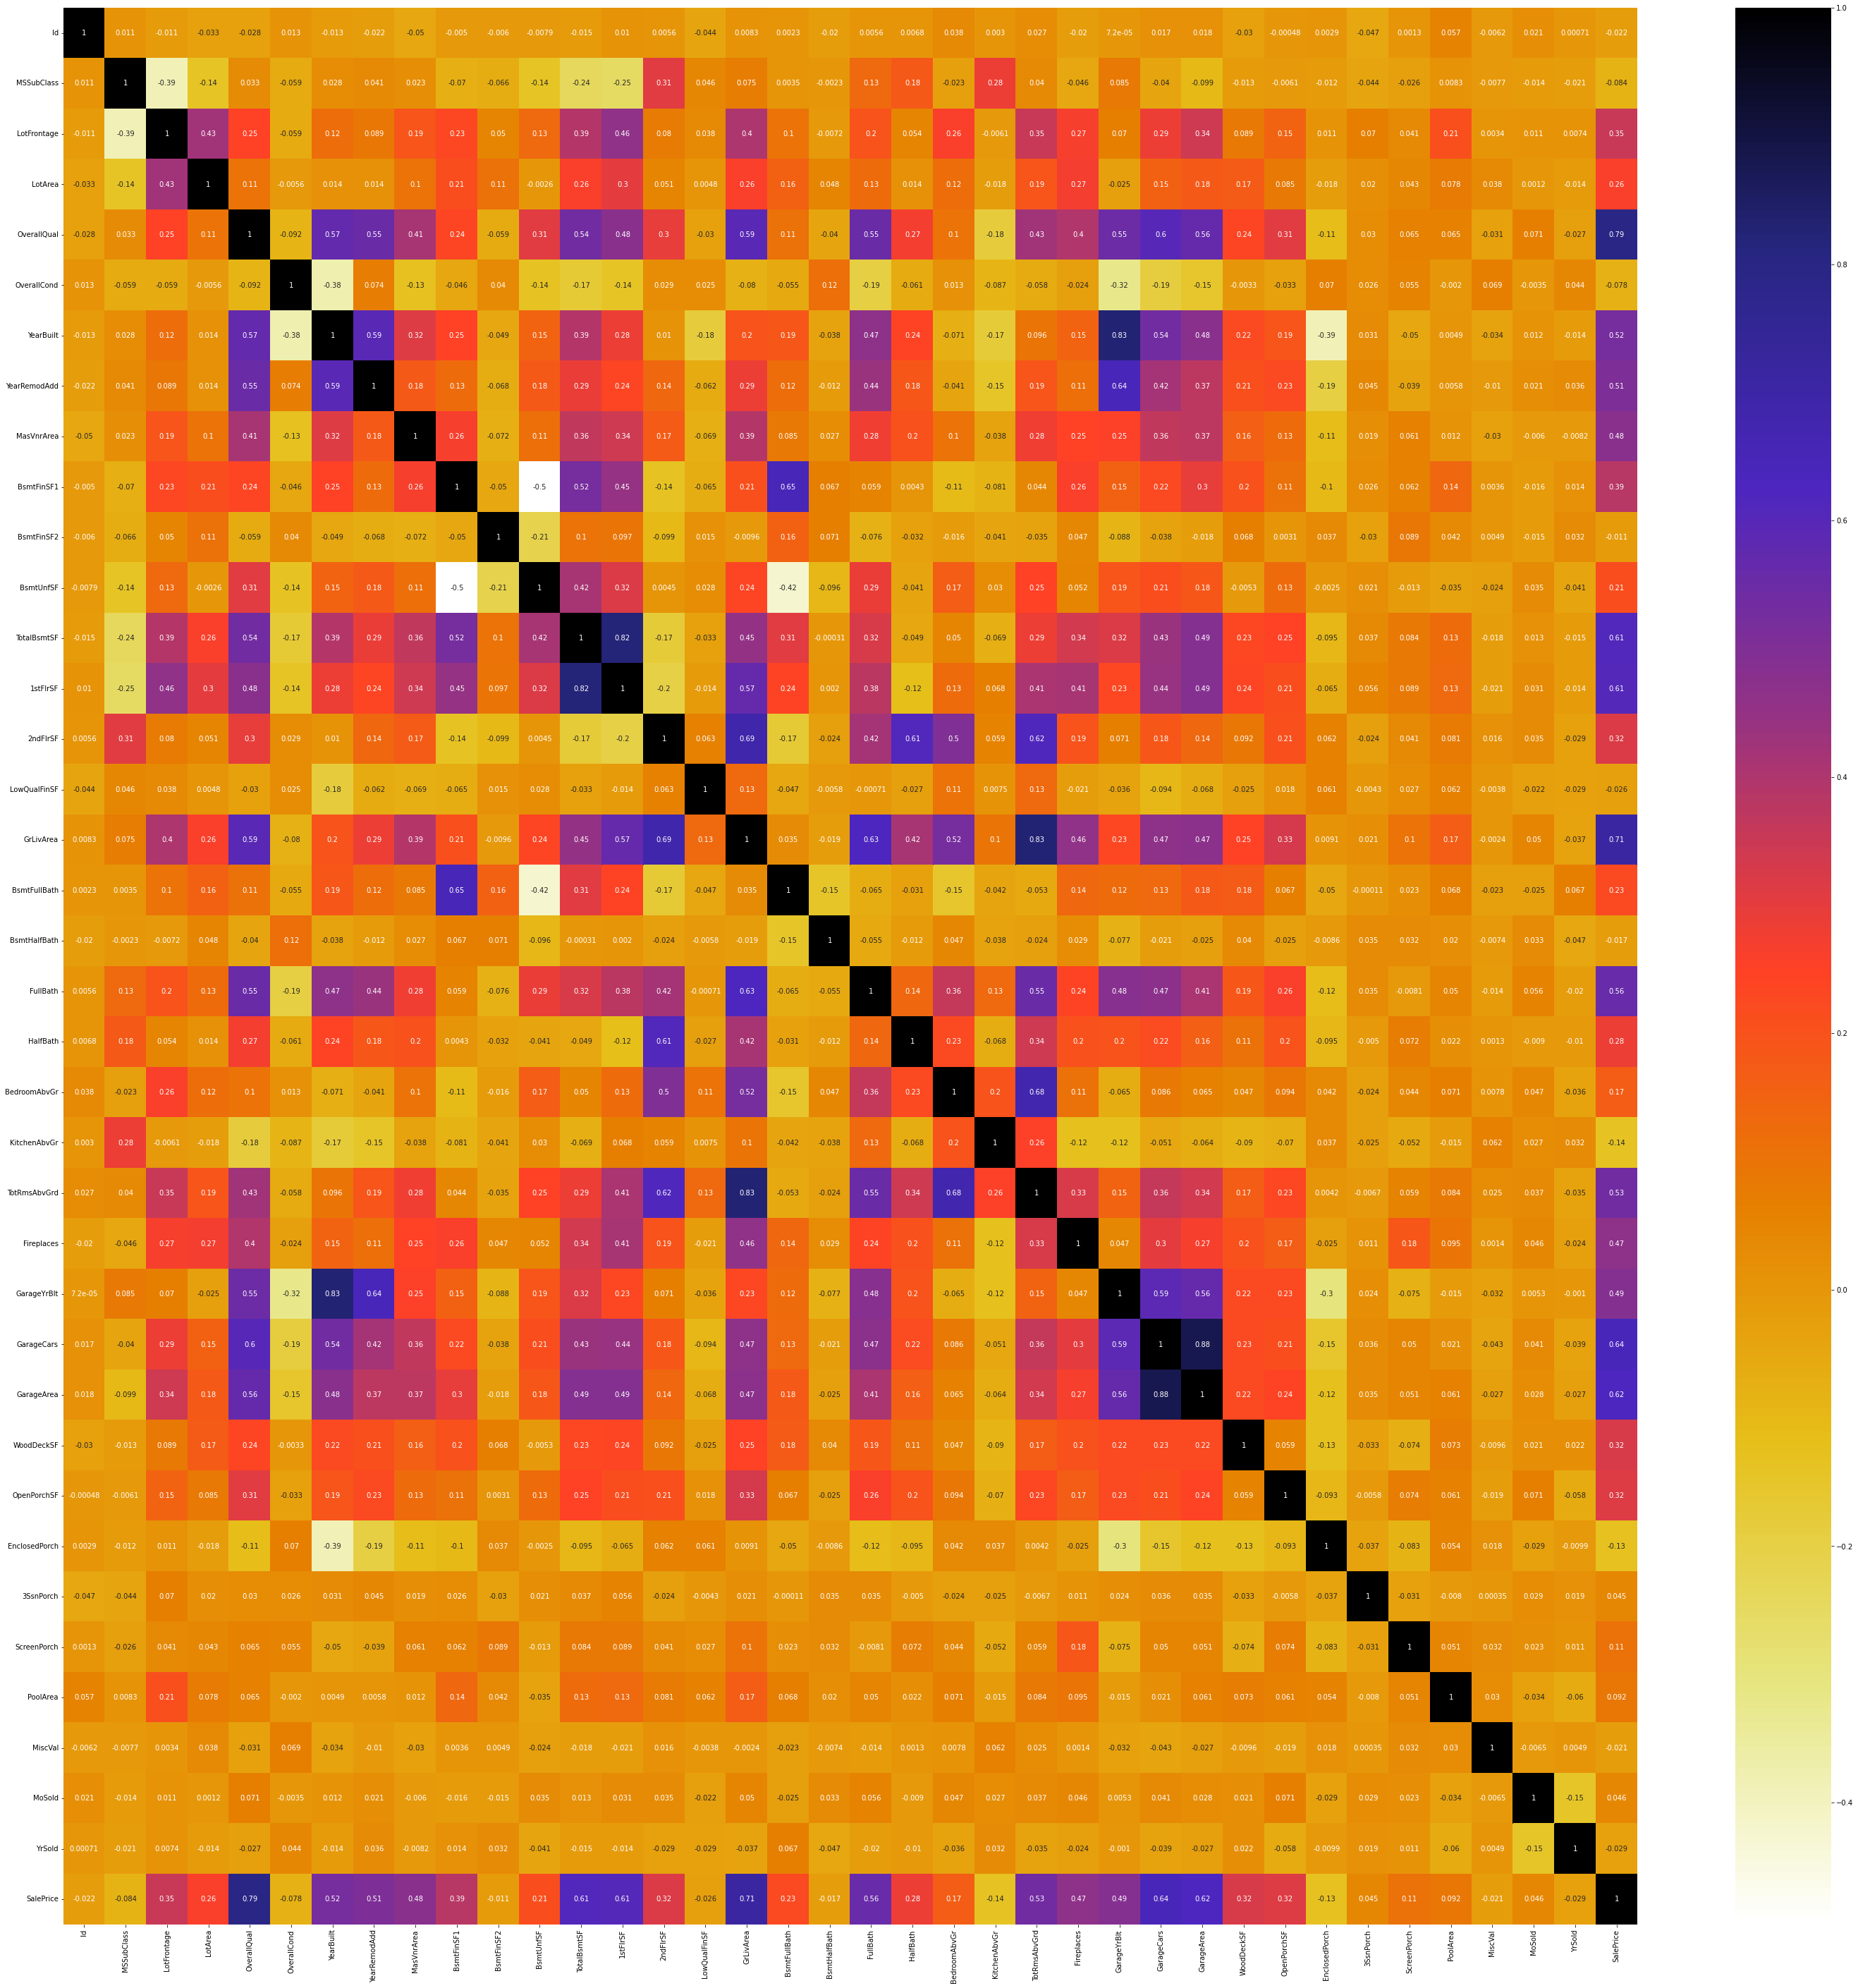

In [29]:
#Armamos un heatmap para determinar la correlación entre variables - Principalmente, queremos definir qué porcentaje de la varianza de 'saleprice' explica cada atributo.

cor = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [30]:
#Se identifican como principales variables que explican la varianza de 'saleprice' a: 'OverallQual' y 'GrLivArea'.

## Pasamos a calcular exactamente qué porción de la varianza de 'SalePrice' explica cada uno de estos atributos previamente seleccionados.

### Probar con RFECV SelectKBest y f_regression

### En el heatmap puede verse que la superficie del piso 1 explica el .61 de la varianza del precio de venta, mientras la del segundo piso un .32 / Complementando ambas variables obtendremos un valor de superficie que copiará mejor su impacto en el valor de venta:

df['TotalSF'] = df['1stFlrSF']+df['2ndFlrSF']

data= df[['OverallQual','GrLivArea','SalePrice', 'GarageCars','GarageArea', 'TotalBsmtSF', 'TotalSF']]
data.head()

OverallQual  GrLivArea  SalePrice  GarageCars  GarageArea  TotalBsmtSF  \
0            7       1710     208500           2         548          856   
1            6       1262     181500           2         460         1262   
2            7       1786     223500           2         608          920   
3            7       1717     140000           3         642          756   
4            8       2198     250000           3         836         1145   

   TotalSF  
0     1710  
1     1262  
2     1786  
3     1717  
4     2198

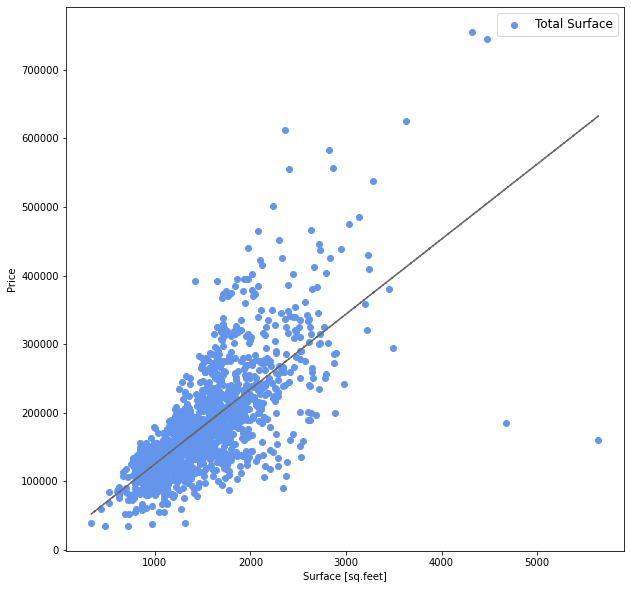

In [31]:
y=df['SalePrice']
x=df['TotalSF']
plt.figure(figsize=(10,10))
plt.scatter(df['TotalSF'], df['SalePrice'], color='cornflowerblue', label="Total Surface")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", c='dimgrey')
plt.ylabel('Price')
plt.xlabel('Surface [sq.feet]')
plt.legend(loc='best', facecolor='w', fontsize=12)


In [32]:
## Normalización de variables

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in data.columns:
  if col == 'Symbol':
    pass
  else:
    data[col] = min_max_scaling(data[col])
data.head()

<ipython-input-32-b91e09d5d2d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = min_max_scaling(data[col])


OverallQual  GrLivArea  SalePrice  GarageCars  GarageArea  TotalBsmtSF  \
0     0.666667   0.259231   0.241078        0.50    0.386460     0.140098   
1     0.555556   0.174830   0.203583        0.50    0.324401     0.206547   
2     0.666667   0.273549   0.261908        0.50    0.428773     0.150573   
3     0.666667   0.260550   0.145952        0.75    0.452750     0.123732   
4     0.777778   0.351168   0.298709        0.75    0.589563     0.187398   

    TotalSF  
0  0.259231  
1  0.174830  
2  0.273549  
3  0.260550  
4  0.351168

In [33]:
model1 = 'SalePrice~TotalSF+OverallQual+GrLivArea+TotalBsmtSF+GarageArea'
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     914.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:58:08   Log-Likelihood:                 2185.2
No. Observations:                1460   AIC:                            -4358.
Df Residuals:                    1454   BIC:                            -4327.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1302      0.005    -23.723      

Con las variables seleccionadas se explica el 75,9% de la varianza

In [34]:
model1 = 'SalePrice~GrLivArea'
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.52e-223
Time:                        00:58:08   Log-Likelihood:                 1656.4
No. Observations:                1460   AIC:                            -3309.
Df Residuals:                    1458   BIC:                            -3298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0270      0.005      5.385      0.0

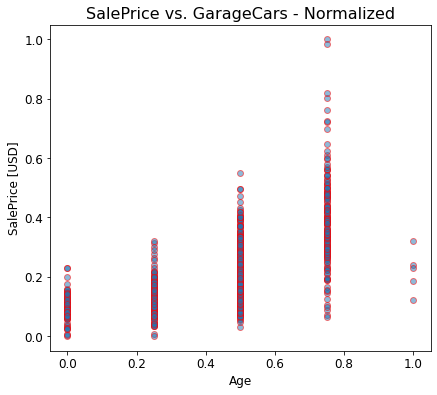

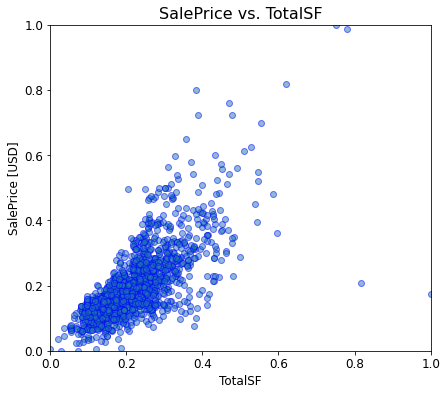

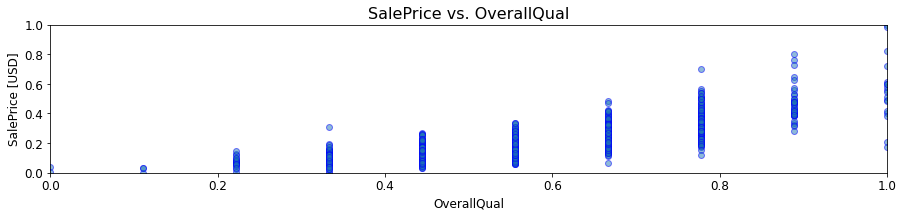

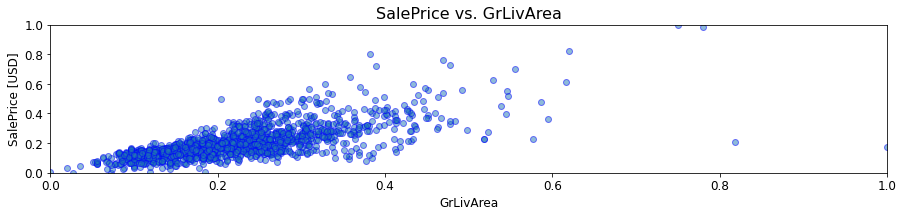

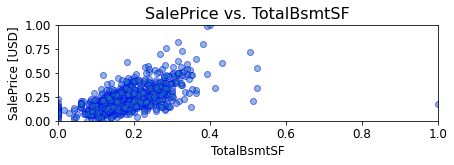

In [35]:
plt.figure(figsize=(15,6))

# SalePrice vs. GarageCars - Normalizados
plt.subplot(121)
plt.scatter(data['GarageCars'], data['SalePrice'], edgecolor='r', alpha=0.5)
#plt.xlim(-0.05, 1.05)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
#plt.ylim(-0.05, 1.05)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. GarageCars - Normalized', fontsize=16)

# SalePrice vs TotalSF - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(122)
plt.scatter(data['TotalSF'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('TotalSF', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. TotalSF', fontsize=16)
plt.show()

# SalePrice vs OverallQual - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(212)
plt.scatter(data['OverallQual'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('OverallQual', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. OverallQual', fontsize=16)
plt.show()

# SalePrice vs GrLivArea - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(212)
plt.scatter(data['GrLivArea'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('GrLivArea', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. GrLivArea', fontsize=16)
plt.show()

# SalePrice vs TotalBsmtSF - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(325)
plt.scatter(data['TotalBsmtSF'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('TotalBsmtSF', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. TotalBsmtSF', fontsize=16)
plt.show()

In [36]:
# Antes de armar el modelo predictivo, corroboramos que las features elegidas no cuentan con valores nulos

data.isnull().sum()

OverallQual    0
GrLivArea      0
SalePrice      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
TotalSF        0
dtype: int64

In [37]:
# Preparamos los valores de "X" y de "Y" para el modelo de regresión

data_X = data.drop(columns = 'SalePrice')
data_y = df['SalePrice'] # En este caso uso el dataframe original porque quiero predecir el valor exacto, no me interesa la variable normalizada

In [38]:
data_X


OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF   TotalSF
0        0.666667   0.259231        0.50    0.386460     0.140098  0.259231
1        0.555556   0.174830        0.50    0.324401     0.206547  0.174830
2        0.666667   0.273549        0.50    0.428773     0.150573  0.273549
3        0.666667   0.260550        0.75    0.452750     0.123732  0.260550
4        0.777778   0.351168        0.75    0.589563     0.187398  0.351168
...           ...        ...         ...         ...          ...       ...
1455     0.555556   0.247362        0.50    0.324401     0.155974  0.247362
1456     0.555556   0.327619        0.50    0.352609     0.252373  0.327619
1457     0.666667   0.377920        0.25    0.177715     0.188543  0.377920
1458     0.444444   0.140166        0.25    0.169252     0.176432  0.140166
1459     0.444444   0.173700        0.25    0.194640     0.205565  0.173700

[1460 rows x 6 columns]

In [39]:
data_y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.15)

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)
c = lr.intercept_
print("c=", c)
m = lr.coef_
print("m=", m)

c= -57388.24892703362
m= [209081.92620257 -65623.6183602   58321.24057573  21822.44416503
 176623.78322445 317948.5212712 ]


In [43]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 83103.69516325, 319800.32081935, 104485.26001966, ...,
       206542.63903035, 188921.1620922 , 173192.50136483])

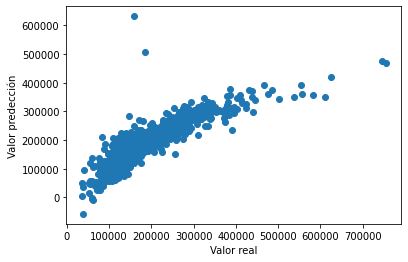

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [45]:
from sklearn.metrics import r2_score
pred1 = round(r2_score(y_train, y_pred_train)*100, 2)
pred1

75.23

Las predicciones de precios de venta de las propiedades se ajustan en un 75,68% a los valores reales de las mismas. Se trata de un modelo aceptable para predecir dichos valores.

In [46]:
#Cambiamos el método de feature selection por forward selection para ver cómo performa la predicción

##Completamos los valores nulos cambiándolos por la mediana de la columna para evitar mayores errores en la predicción

df = df.fillna(df.median())

<ipython-input-46-d0d8a577040e>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [47]:
## Excluimos el dtype object ya que de otra forma no funciona el modelo de forward selection


df = df.select_dtypes(exclude=['object'])

## Normalizamos los datos, esta vez para el dataframe con todas sus columnas

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df.columns:
  if col == 'Symbol':
    pass
  else:
    df[col] = min_max_scaling(df[col])
df.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000000    0.235294     0.150685  0.033420     0.666667        0.500   
1  0.000685    0.000000     0.202055  0.038795     0.555556        0.875   
2  0.001371    0.235294     0.160959  0.046507     0.666667        0.500   
3  0.002056    0.294118     0.133562  0.038561     0.666667        0.500   
4  0.002742    0.235294     0.215753  0.060576     0.777778        0.500   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  OpenPorchSF  \
0   0.949275      0.883333     0.12250    0.125089  ...     0.111517   
1   0.753623      0.433333     0.00000    0.173281  ...     0.000000   
2   0.934783      0.866667     0.10125    0.086109  ...     0.076782   
3   0.311594      0.333333     0.00000    0.038271  ...     0.063985   
4   0.927536      0.833333     0.21875    0.116052  ...     0.153565   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0  0.090909    0.50   
1       0.000000        0.0          0.0       0.0      0.0  0.363636    0.25   
2       0.000000        0.0          0.0       0.0      0.0  0.727273    0.50   
3       0.492754        0.0          0.0       0.0      0.0  0.090909    0.00   
4       0.000000        0.0          0.0       0.0      0.0  1.000000    0.50   

   SalePrice   TotalSF  
0   0.241078  0.259231  
1   0.203583  0.174830  
2   0.261908  0.273549  
3   0.145952  0.260550  
4   0.298709  0.351168  

[5 rows x 39 columns]

In [48]:
## Establecemos los valores de X e y para hacer una selección sobre cómo los valores afectan al atributo SalePrice

df_X = df.drop(columns = 'SalePrice')
df_y = df['SalePrice']

In [49]:
## Script para la función forward selection:

import statsmodels.api as sm
def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [50]:
forward_selection(df_X, df_y)

<ipython-input-49-b81751b009e1>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: Future

['OverallQual',
 'TotalSF',
 'BsmtFinSF1',
 'GarageCars',
 'MSSubClass',
 'YearRemodAdd',
 'MasVnrArea',
 'LotArea',
 'BedroomAbvGr',
 'YearBuilt',
 'OverallCond',
 'BsmtFullBath',
 'TotRmsAbvGrd',
 'ScreenPorch',
 'WoodDeckSF',
 'TotalBsmtSF',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt']

In [51]:
# Rehacemos el dataset de entrenamiento con estas nuevas columnas

df_fs_columns = ['OverallQual','GrLivArea','BsmtFinSF1','GarageCars','MSSubClass','YearBuilt','BedroomAbvGr','OverallCond','LotArea','MasVnrArea','BsmtFullBath','TotRmsAbvGrd','WoodDeckSF','ScreenPorch','TotalBsmtSF','YearRemodAdd']

df_X_fs = df[df_fs_columns]

In [52]:
## Volvemos a entrenar el modelo, esta vez usando las columnas seleccionadas con forward selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X_fs, df_y, test_size = 0.15)

In [53]:
lr.fit(X_train, y_train)
c = lr.intercept_
print("c=", c)
m = lr.coef_
print("m=", m)

c= -0.14207114577986169
m= [ 0.23139869  0.39759484  0.07992223  0.053611   -0.04342146  0.0698454
 -0.12988312  0.05452347  0.13850857  0.07739206  0.03156999  0.0738474
  0.03068962  0.04220005  0.08190085  0.01387023]


In [54]:
y_pred_train1 = lr.predict(X_train)
y_pred_train1

array([0.2034188 , 0.34205954, 0.15316457, ..., 0.19005022, 0.17899546,
       0.35452438])

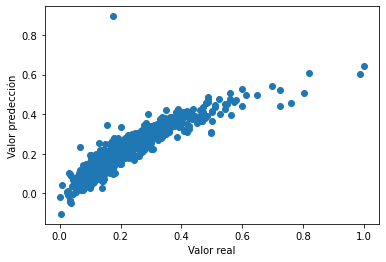

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train1)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [56]:
from sklearn.metrics import r2_score
pred2=round(r2_score(y_train, y_pred_train1)*100,2)

print('Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un ',  pred1, '% a un ', pred2, '%')

Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un  75.23 % a un  81.81 %


Mediante el método manual de selección de atributos habíamos obtenido un 75,08% de precisión en la predicción de datos. Utilizando el cambio el método de feature selection **forward selection** obtenemos un **84,20%**. Esto se traduce en un modelo que explica mejor la varianza del dataset.

In [57]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSF'],
      dtype='object')

In [58]:
#Echamos un vistazo al DataFrame armado con las columnas seleccionadas por forward selection

df_X_fs

OverallQual  GrLivArea  BsmtFinSF1  GarageCars  MSSubClass  YearBuilt  \
0        0.666667   0.259231    0.125089        0.50    0.235294   0.949275   
1        0.555556   0.174830    0.173281        0.50    0.000000   0.753623   
2        0.666667   0.273549    0.086109        0.50    0.235294   0.934783   
3        0.666667   0.260550    0.038271        0.75    0.294118   0.311594   
4        0.777778   0.351168    0.116052        0.75    0.235294   0.927536   
...           ...        ...         ...         ...         ...        ...   
1455     0.555556   0.247362    0.000000        0.50    0.235294   0.920290   
1456     0.555556   0.327619    0.139972        0.50    0.000000   0.768116   
1457     0.666667   0.377920    0.048724        0.25    0.294118   0.500000   
1458     0.444444   0.140166    0.008682        0.25    0.000000   0.565217   
1459     0.444444   0.173700    0.147059        0.25    0.000000   0.673913   

      BedroomAbvGr  OverallCond   LotArea  MasVnrArea  BsmtFullBath  \
0            0.375        0.500  0.033420    0.122500      0.333333   
1            0.375        0.875  0.038795    0.000000      0.000000   
2            0.375        0.500  0.046507    0.101250      0.333333   
3            0.375        0.500  0.038561    0.000000      0.333333   
4            0.500        0.500  0.060576    0.218750      0.333333   
...            ...          ...       ...         ...           ...   
1455         0.375        0.500  0.030929    0.000000      0.000000   
1456         0.375        0.625  0.055505    0.074375      0.333333   
1457         0.500        1.000  0.036187    0.000000      0.000000   
1458         0.250        0.625  0.039342    0.000000      0.333333   
1459         0.375        0.625  0.040370    0.000000      0.333333   

      TotRmsAbvGrd  WoodDeckSF  ScreenPorch  TotalBsmtSF  YearRemodAdd  
0         0.500000    0.000000          0.0     0.140098      0.883333  
1         0.333333    0.347725          0.0     0.206547      0.433333  
2         0.333333    0.000000          0.0     0.150573      0.866667  
3         0.416667    0.000000          0.0     0.123732      0.333333  
4         0.583333    0.224037          0.0     0.187398      0.833333  
...            ...         ...          ...          ...           ...  
1455      0.416667    0.000000          0.0     0.155974      0.833333  
1456      0.416667    0.407235          0.0     0.252373      0.633333  
1457      0.583333    0.000000          0.0     0.188543      0.933333  
1458      0.250000    0.427071          0.0     0.176432      0.766667  
1459      0.333333    0.858810          0.0     0.205565      0.250000  

[1460 rows x 16 columns]

In [59]:
#Cambiaremos el método a DecisionTreeRegression para observar si se genera algun tipo de optimización

!pip install dmba


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.5 MB/s eta 0:00:00


In [60]:
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree

houses_dt = DecisionTreeRegressor(max_depth=10)
houses_dt.fit(df_X_fs, df_y)

#Observamos el árbol de decisión armado

plotDecisionTree(houses_dt, feature_names=df_X_fs.columns, rotate=True)

no display found. Using non-interactive Agg backend


In [61]:
X_dt_test = X_test[df_fs_columns]
X_dt_test

OverallQual  GrLivArea  BsmtFinSF1  GarageCars  MSSubClass  YearBuilt  \
549      0.666667   0.331575    0.000000        0.50    0.235294   0.949275   
267      0.444444   0.350038    0.066974        0.25    0.323529   0.485507   
243      0.555556   0.166353    0.000000        0.25    0.823529   0.782609   
1026     0.444444   0.175207    0.123494        0.50    0.000000   0.637681   
963      0.888889   0.276187    0.000000        0.50    0.000000   0.978261   
...           ...        ...         ...         ...         ...        ...   
199      0.777778   0.259797    0.192771        0.75    0.000000   0.956522   
714      0.555556   0.215712    0.094437        0.50    0.235294   0.753623   
562      0.444444   0.124717    0.051382        0.00    0.058824   0.492754   
88       0.222222   0.224567    0.000000        0.00    0.176471   0.311594   
977      0.666667   0.170874    0.195960        0.50    0.588235   0.971014   

      BedroomAbvGr  OverallCond   LotArea  MasVnrArea  BsmtFullBath  \
549          0.500        0.500  0.037743    0.000000      0.000000   
267          0.500        0.875  0.033186    0.000000      0.000000   
243          0.375        0.625  0.044226    0.000000      0.000000   
1026         0.375        0.500  0.037393    0.202500      0.333333   
963          0.250        0.500  0.049653    0.000000      0.000000   
...            ...          ...       ...         ...           ...   
199          0.375        0.500  0.038753    0.163750      0.333333   
714          0.375        0.875  0.057103    0.180625      0.000000   
562          0.375        0.625  0.058926    0.000000      0.333333   
88           0.250        0.125  0.033513    0.000000      0.000000   
977          0.125        0.500  0.013901    0.000000      0.333333   

      TotRmsAbvGrd  WoodDeckSF  ScreenPorch  TotalBsmtSF  YearRemodAdd  
549       0.500000    0.212369     0.000000     0.149264      0.900000  
267       0.500000    0.305718     0.000000     0.117840      0.783333  
243       0.333333    0.000000     0.000000     0.102455      0.500000  
1026      0.333333    0.000000     0.297917     0.207529      0.166667  
963       0.416667    0.336056     0.000000     0.294599      0.950000  
...            ...         ...          ...          ...           ...  
199       0.416667    0.000000     0.354167     0.280360      0.916667  
714       0.333333    0.000000     0.000000     0.118658      0.916667  
562       0.333333    0.168028     0.000000     0.163011      0.316667  
88        0.333333    0.000000     0.000000     0.165794      0.533333  
977       0.166667    0.000000     0.000000     0.203110      0.950000  

[219 rows x 16 columns]

In [62]:
y_predict = houses_dt.predict(df_X_fs)
y_predict

array([0.21250406, 0.18447798, 0.25895153, ..., 0.28426607, 0.141349  ,
       0.1617935 ])

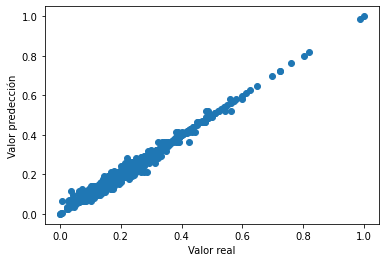

In [63]:
import matplotlib.pyplot as plt
plt.scatter(df_y, y_predict)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [64]:
print('Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un ',  pred1, '% a un ', round((houses_dt.score(df_X_fs, df_y))*100, 2), '%')

Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un  75.23 % a un  98.36 %


# Cross Validation - Halving Grid Search

In [67]:
# Ejecutaremos un proceso de cross validation para mejorar el modelo predictivo. 
## En este caso comenzaremos evaluando los hiperparámetros para un modelo de regresión lineal
### Comenzamos cargando las librerías de sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

### Definimos los valores posibles para los hiperparámetros
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

### Creamos el objeto de modelo de regresión lineal
linear_regression = LinearRegression()

### Creamos el objeto GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

### Ajustamos el modelo usando los datos de entrenamiento
grid_search.fit(df_X_fs, df_y)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [68]:
### Imprimimos los mejores valores de hiperparámetros encontrados
print("Mejores valores de hiperparámetros: ", grid_search.best_params_)

### Imprimimos el error cuadrático medio del modelo ajustado
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: ", mse)

Mejores valores de hiperparámetros:  {'fit_intercept': True, 'normalize': True}
Error cuadrático medio:  0.16595617973768595


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
## Ahora evaluaremos los hiperparámetros para el modelo creado anteriormente con árbol de decisión. 

# Definimos los valores posibles para los hiperparámetros
param_grid2 = {'max_depth': [2, 4, 6, 8, 10]}


# Creamos el objeto de modelo de árbol de decisión
DecisionTree = DecisionTreeRegressor()

# Creamos el objeto GridSearchCV
grid_search2 = GridSearchCV(DecisionTree, param_grid2, cv=5, scoring='neg_mean_squared_error')

# Ajustamos el modelo usando los datos de entrenamiento
grid_search2.fit(df_X_fs, df_y)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [72]:
# Imprimimos los mejores valores de hiperparámetros encontrados
print("Mejores valores de hiperparámetros: ", grid_search2.best_params_)

# Imprimimos el error cuadrático medio del modelo ajustado
y_pred2 = grid_search2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: ", mse)

Mejores valores de hiperparámetros:  {'max_depth': 8}
Error cuadrático medio:  0.16595617973768595


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


En el paso de entrenamiento del modelo con DecisionTreeRegresor habíamos establecido una max_depth (profundidad máxima) de 10, y el modelo mejoraba sustancialmente su precisión. No obstante, con la mejora del modelo y con el fin de evitar el error por overfitting lo repetiremos estableciendo la profundidad recomendada por el método de cross validation Halving Grid Search.

In [73]:
houses_dt_CV = DecisionTreeRegressor(max_depth=8)
houses_dt_CV.fit(df_X_fs, df_y)

DecisionTreeRegressor(max_depth=8)

In [74]:
y_predict_CV = houses_dt_CV.predict(df_X_fs)
y_predict_CV

array([0.21297516, 0.17792016, 0.24366628, ..., 0.27331368, 0.14262539,
       0.17792016])

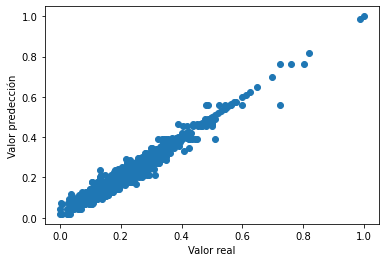

In [75]:
import matplotlib.pyplot as plt
plt.scatter(df_y, y_predict_CV)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [84]:
print('Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un ',  pred1, '% a un ', round((houses_dt.score(df_X_fs, df_y))*100, 2), '%')

print('Luego, para evitar errores de predicción por overfitting, usamos el método de cross validation Halving Grid Search, con el cual establecemos que puede reducirse la profundidad del árbol de decisión de 10 a 8, manteniendo de igual manera una precisión del ', round((houses_dt.score(df_X_fs, y_predict_CV))*100, 2), '%')

Utilizando el método de DecisionTreeRegressor con los atributos seleccionados por FeatureSelection, el modelo mejora en su precisión de un  75.23 % a un  98.36 %
Luego, para evitar errores de predicción por overfitting, usamos el método de cross validation Halving Grid Search, con el cual establecemos que puede reducirse la profundidad del árbol de decisión de 10 a 8, manteniendo de igual manera una precisión del  97.26 %
